In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import requests
import folium
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
plt.rc('font', family='D2Coding')

In [3]:
# 서울 지하철 승하차량
# 사용자 입력으로 날짜 받기
input_station_name = input("역 이름을 입력하세요: ")
input_date = input("날짜를 입력하세요 (YYYY-MM-DD): ")
target_date = datetime.strptime(input_date, '%Y-%m-%d')

# 계산된 날짜에 따라 마지막 페이지 계산
base_date = datetime(2022, 1, 1)  # 시작 날짜
days_diff = (target_date - base_date).days
last_page = 378 - days_diff
targetSite = f'https://data.gg.go.kr/portal/data/sheet/searchSheetData.do?page={last_page}'

print(f"입력한 날짜: {input_date}")
print(f"계산된 마지막 페이지: {last_page}")
print(f"조회 URL: {targetSite}")

request1 = requests.post(targetSite, data={
    'rows': '1',
    'infId': '7GZ08I0JWSNPY5NVMLLG24313533',
    'infSeq': 1,
    'STATN_NM': input_station_name,
    'TKALGHT_DIV_NM' : '승차',
    'STD_DE' : '', 
    'STATN_NO' : '',
    'TM05_PSNCNT' : '',
    'TM06_PSNCNT': '',
    'TM07_PSNCNT': '',
    'TM08_PSNCNT': '',
    'TM09_PSNCNT': '',
    'TM10_PSNCNT': '',
    'TM11_PSNCNT': '',
    'TM12_PSNCNT': '',
    'TM13_PSNCNT': '',
    'TM14_PSNCNT': '',
    'TM15_PSNCNT': '',
    'TM16_PSNCNT': '',
    'TM17_PSNCNT': '',
    'TM18_PSNCNT': '',
    'TM19_PSNCNT': '',
    'TM20_PSNCNT': '',
    'TM21_PSNCNT': '',
    'TM22_PSNCNT': '',
    'TM23_PSNCNT': '',
    'TM24_PSNCNT': ''
})
request2 = requests.post(targetSite, data={
    'rows': '1',
    'infId': '7GZ08I0JWSNPY5NVMLLG24313533',
    'infSeq': 1,
    'STATN_NM': input_station_name,
    'TKALGHT_DIV_NM' : '하차',
    'STD_DE' : '', 
    'STATN_NO' : '',
    'TM05_PSNCNT' : '',
    'TM06_PSNCNT': '',
    'TM07_PSNCNT': '',
    'TM08_PSNCNT': '',
    'TM09_PSNCNT': '',
    'TM10_PSNCNT': '',
    'TM11_PSNCNT': '',
    'TM12_PSNCNT': '',
    'TM13_PSNCNT': '',
    'TM14_PSNCNT': '',
    'TM15_PSNCNT': '',
    'TM16_PSNCNT': '',
    'TM17_PSNCNT': '',
    'TM18_PSNCNT': '',
    'TM19_PSNCNT': '',
    'TM20_PSNCNT': '',
    'TM21_PSNCNT': '',
    'TM22_PSNCNT': '',
    'TM23_PSNCNT': '',
    'TM24_PSNCNT': ''
})
subway1 = request1.json()
print(type(subway1))
print(subway1)
subway2 = request2.json()
print(type(subway2))
print(subway2)

역 이름을 입력하세요: 종로3가
날짜를 입력하세요 (YYYY-MM-DD): 2022-05-05
입력한 날짜: 2022-05-05
계산된 마지막 페이지: 254
조회 URL: https://data.gg.go.kr/portal/data/sheet/searchSheetData.do?page=254
<class 'dict'>
{'data': [{'STD_DE': '2022-10-08', 'STATN_NO': 1, 'STATN_NM': '종로3가', 'TKALGHT_DIV_NM': '승차', 'TM05_PSNCNT': 174, 'TM06_PSNCNT': 131, 'TM07_PSNCNT': 148, 'TM08_PSNCNT': 363, 'TM09_PSNCNT': 537, 'TM10_PSNCNT': 805, 'TM11_PSNCNT': 1144, 'TM12_PSNCNT': 1856, 'TM13_PSNCNT': 1957, 'TM14_PSNCNT': 2423, 'TM15_PSNCNT': 2765, 'TM16_PSNCNT': 3223, 'TM17_PSNCNT': 2902, 'TM18_PSNCNT': 2755, 'TM19_PSNCNT': 2305, 'TM20_PSNCNT': 1922, 'TM21_PSNCNT': 1879, 'TM22_PSNCNT': 1648, 'TM23_PSNCNT': 730, 'TM24_PSNCNT': 18}], 'total': 1134, 'count': 1134, 'page': 254, 'rows': 1, 'pages': 1134}
<class 'dict'>
{'data': [{'STD_DE': '2022-10-08', 'STATN_NO': 3, 'STATN_NM': '종로3가', 'TKALGHT_DIV_NM': '하차', 'TM05_PSNCNT': 17, 'TM06_PSNCNT': 96, 'TM07_PSNCNT': 134, 'TM08_PSNCNT': 350, 'TM09_PSNCNT': 634, 'TM10_PSNCNT': 822, 'TM11_PSNCNT': 10

In [4]:
# 데이터프레임 생성
subway_df1 = pd.json_normalize(subway1['data']) # 승차
print(subway_df1)  # 데이터프레임 내용 출력
print(subway_df1.info())  
subway_df1

subway_df2 = pd.json_normalize(subway2['data']) # 하차
print(subway_df2)  # 데이터프레임 내용 출력
print(subway_df2.info())  
subway_df2

       STD_DE  STATN_NO STATN_NM TKALGHT_DIV_NM  TM05_PSNCNT  TM06_PSNCNT  \
0  2022-10-08         1     종로3가             승차          174          131   

   TM07_PSNCNT  TM08_PSNCNT  TM09_PSNCNT  TM10_PSNCNT  ...  TM15_PSNCNT  \
0          148          363          537          805  ...         2765   

   TM16_PSNCNT  TM17_PSNCNT  TM18_PSNCNT  TM19_PSNCNT  TM20_PSNCNT  \
0         3223         2902         2755         2305         1922   

   TM21_PSNCNT  TM22_PSNCNT  TM23_PSNCNT  TM24_PSNCNT  
0         1879         1648          730           18  

[1 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STD_DE          1 non-null      object
 1   STATN_NO        1 non-null      int64 
 2   STATN_NM        1 non-null      object
 3   TKALGHT_DIV_NM  1 non-null      object
 4   TM05_PSNCNT     1 non-null      int64 
 5   TM06

,STD_DE,STATN_NO,STATN_NM,TKALGHT_DIV_NM,TM05_PSNCNT,TM06_PSNCNT,TM07_PSNCNT,TM08_PSNCNT,TM09_PSNCNT,TM10_PSNCNT,...,TM15_PSNCNT,TM16_PSNCNT,TM17_PSNCNT,TM18_PSNCNT,TM19_PSNCNT,TM20_PSNCNT,TM21_PSNCNT,TM22_PSNCNT,TM23_PSNCNT,TM24_PSNCNT
0,2022-10-08,3,종로3가,하차,17,96,134,350,634,822,...,964,951,844,655,441,265,319,230,112,49


In [5]:
subway_df2.columns

Index(['STD_DE', 'STATN_NO', 'STATN_NM', 'TKALGHT_DIV_NM', 'TM05_PSNCNT',
       'TM06_PSNCNT', 'TM07_PSNCNT', 'TM08_PSNCNT', 'TM09_PSNCNT',
       'TM10_PSNCNT', 'TM11_PSNCNT', 'TM12_PSNCNT', 'TM13_PSNCNT',
       'TM14_PSNCNT', 'TM15_PSNCNT', 'TM16_PSNCNT', 'TM17_PSNCNT',
       'TM18_PSNCNT', 'TM19_PSNCNT', 'TM20_PSNCNT', 'TM21_PSNCNT',
       'TM22_PSNCNT', 'TM23_PSNCNT', 'TM24_PSNCNT'],
      dtype='object')

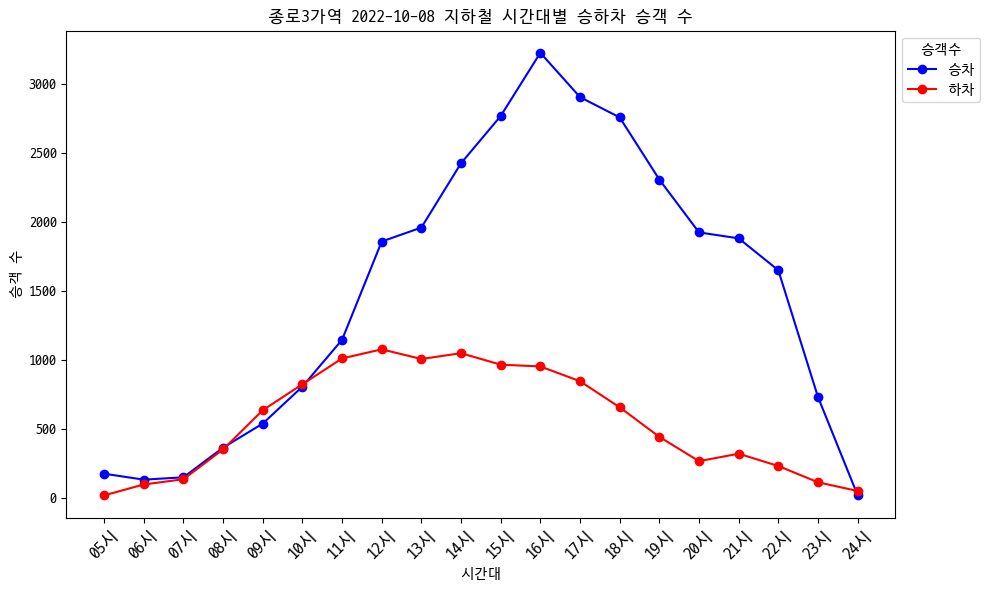

In [6]:
# 열 이름 변경
subway_df1.columns = ['STD_DE', 'STATN_NO', 'STATN_NM', 'DIV', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
subway_df2.columns = ['STD_DE', 'STATN_NO', 'STATN_NM', 'DIV', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']

# 역 이름 추출
desired_station_name = subway_df1.loc[0, 'STATN_NM']
# 날짜 추출
desired_date = subway_df1.loc[0, 'STD_DE']
# 승차 데이터 추출
entry_data = subway_df1.iloc[0, 4:24]

# 하차 데이터 추출
exit_data = subway_df2.iloc[0, 4:24]

# 시간대별 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(entry_data.index, entry_data, marker='o', label='승차', color='b')
plt.plot(exit_data.index, exit_data, marker='o', label='하차', color='r')

# x축 인덱스 변경
time_labels = [f'{i:02d}시' for i in range(5, 25)]
plt.xticks(range(len(entry_data)), time_labels, fontsize=12, rotation=45)

plt.title(f'{desired_station_name}역 {desired_date} 지하철 시간대별 승하차 승객 수')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.legend(title='승객수', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
